## Imports

In [34]:
# tabulate can be used to format output
import sys

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as lng
import scipy.io as io
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV

## Load dataset

In [37]:
data = io.loadmat(r'C:\Users\JohannHaack\source\DTU\CDA\Week6\Data\zipdata.mat')

X = data['X']
y = data['y'].ravel()
N, P = X.shape

###  4: Load the zip data and make a classification using random forests. As a minimum you need to tune the parameters: The number of trees, the number of variables to sample, and the tree size. Make an effort of explaining what happens when you tune each of the parameters. Which one is more important? Additionally answer:

In [ ]:
# Try to experiment with criterion, number of estimators, max_depth, min_samples_leaf
clf = RandomForestClassifier(bootstrap=True, oob_score=True, criterion = 'gini',random_state=0)

# number of trees
n_estimators = range(5,101)
max_depth = range(1,11)
max_features = range(10,250,20)

# Try to add more of the parameters from the model and then add them to this dict to see how it affects the model.
param_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_features': max_features
}

rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5, verbose=2, n_jobs=-1)

# Fit the grid search model
rf_grid.fit(X, y)

#Save the results in a dataframe to disk
df = pd.DataFrame(rf_grid.cv_results_)
df.to_csv('CrossValidationResultsRandomForest.csv')

print(rf_grid.best_estimator_)

In [38]:
#If you just wanna read the saved results. 
df = pd.read_csv(r'C:\Users\JohannHaack\source\DTU\CDA\Week6\Python_Solutions\CrossValidationResultsRandomForest.csv')

df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,0.012403,0.000748,0.000999,0.000001,1,10,5,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3750,0.3125,0.2750,0.3125,0.3500,0.3250,0.034460,841
1,1,0.014668,0.001165,0.001303,0.000399,1,10,6,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3500,0.2875,0.3125,0.3000,0.3500,0.3200,0.025739,854
2,2,0.018086,0.004825,0.000600,0.000801,1,10,7,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3375,0.3625,0.3125,0.3125,0.3625,0.3375,0.022361,819
3,3,0.018548,0.003237,0.002418,0.002199,1,10,8,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3375,0.3000,0.2875,0.3125,0.3625,0.3200,0.026926,856
4,4,0.021586,0.001919,0.001454,0.000404,1,10,9,"{'max_depth': 1, 'max_features': 10, 'n_estima...",0.3000,0.3625,0.3000,0.3125,0.3250,0.3200,0.023184,856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,0.221150,0.040727,0.001907,0.003337,10,210,15,"{'max_depth': 10, 'max_features': 210, 'n_esti...",0.7500,0.8250,0.8125,0.8750,0.7500,0.8025,0.047697,150
896,896,0.268792,0.037697,0.003381,0.002753,10,210,16,"{'max_depth': 10, 'max_features': 210, 'n_esti...",0.7625,0.8125,0.8250,0.8750,0.7500,0.8050,0.045139,128
897,897,0.257858,0.010174,0.000801,0.001168,10,210,17,"{'max_depth': 10, 'max_features': 210, 'n_esti...",0.7500,0.8125,0.8000,0.8625,0.7625,0.7975,0.039843,204
898,898,0.269456,0.015305,0.000226,0.000452,10,210,18,"{'max_depth': 10, 'max_features': 210, 'n_esti...",0.7625,0.8375,0.8625,0.8625,0.7625,0.8175,0.045826,48


Text(0, 0.5, 'Mean test accuracy')

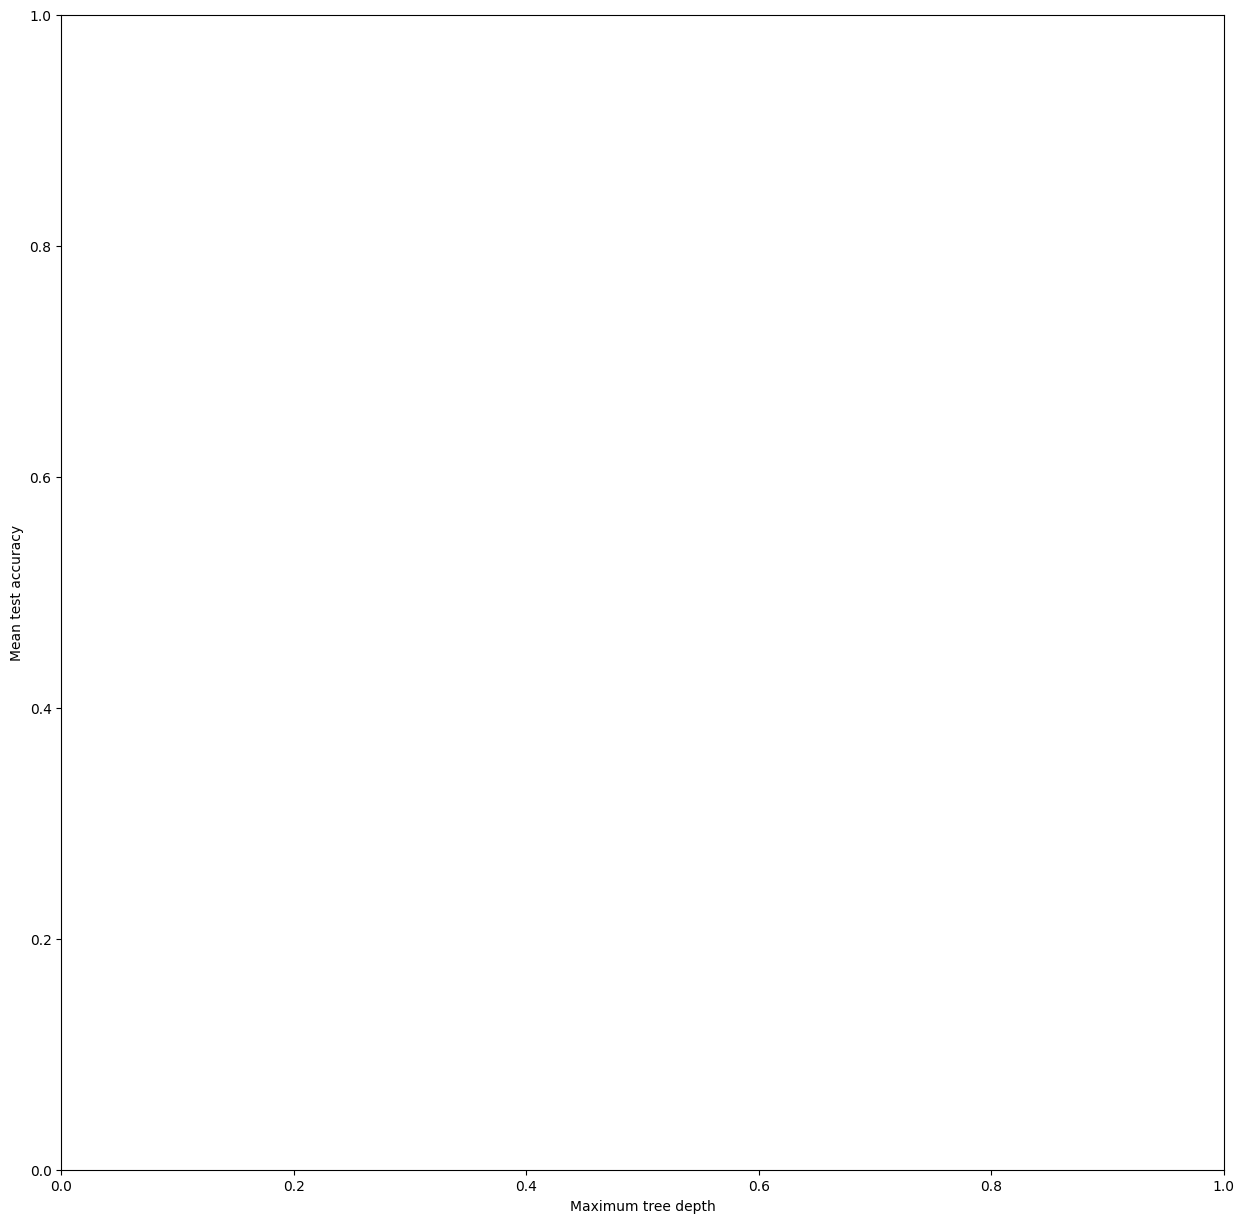

In [39]:
df_100_estimators = df[df['param_n_estimators']==100]

fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_100_estimators, x='param_max_depth', y='mean_test_score', hue='param_max_features', ax=ax)
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

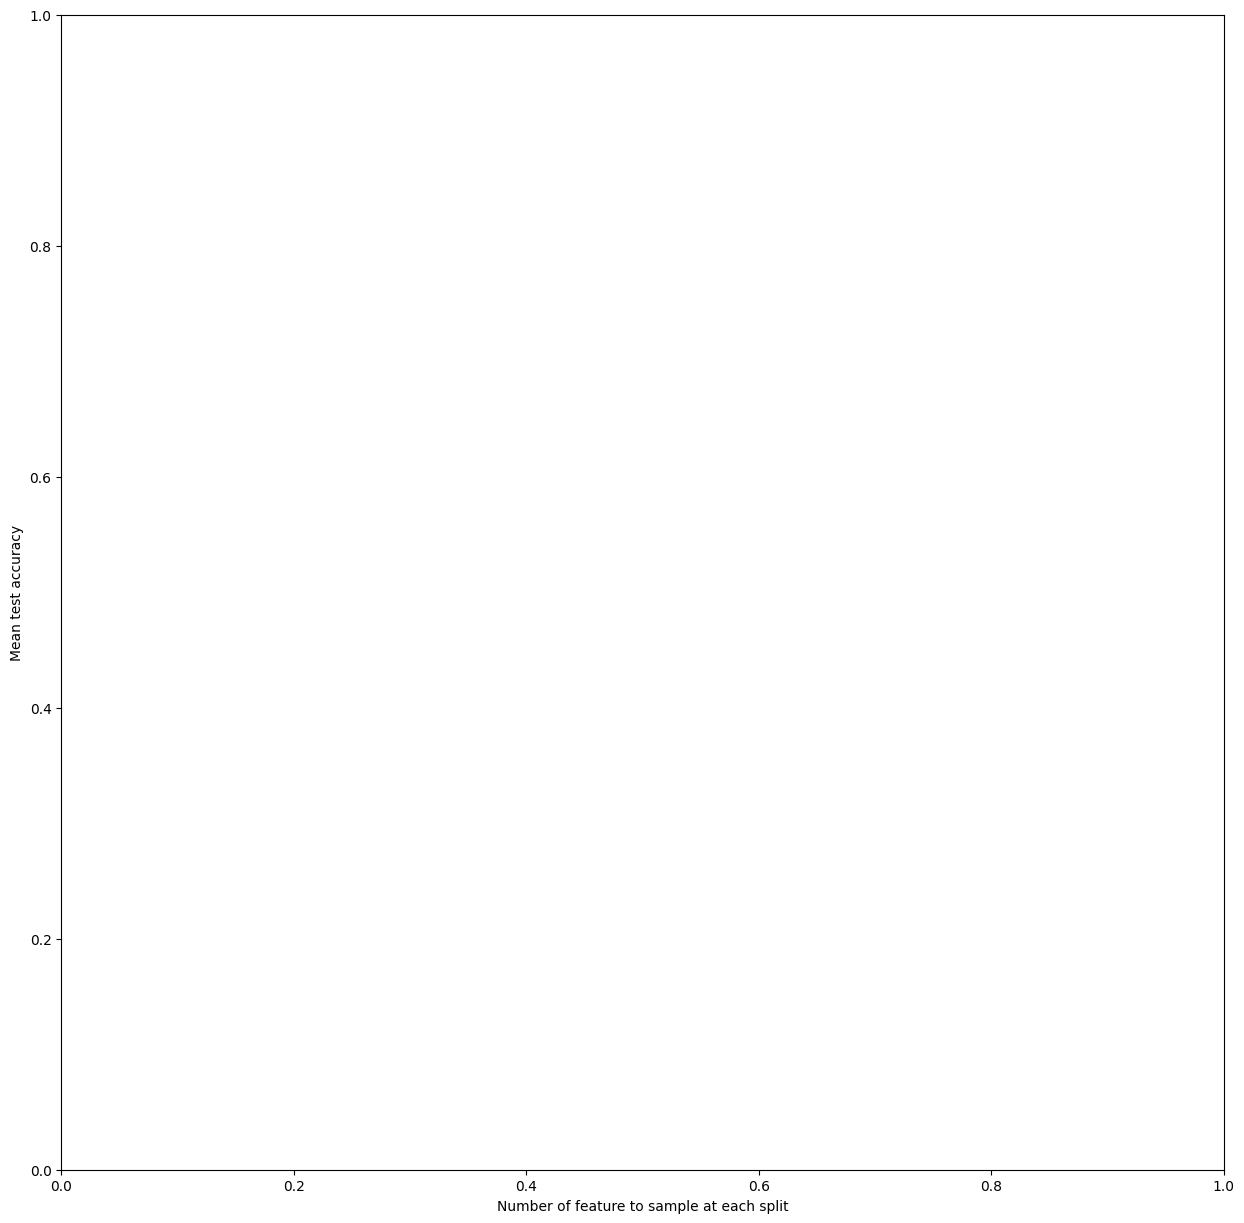

In [40]:
fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_100_estimators, x='param_max_features', y='mean_test_score', hue='param_max_depth', ax=ax)
ax.set_xlabel('Number of feature to sample at each split')
ax.set_ylabel('Mean test accuracy')

Text(0, 0.5, 'Mean test accuracy')

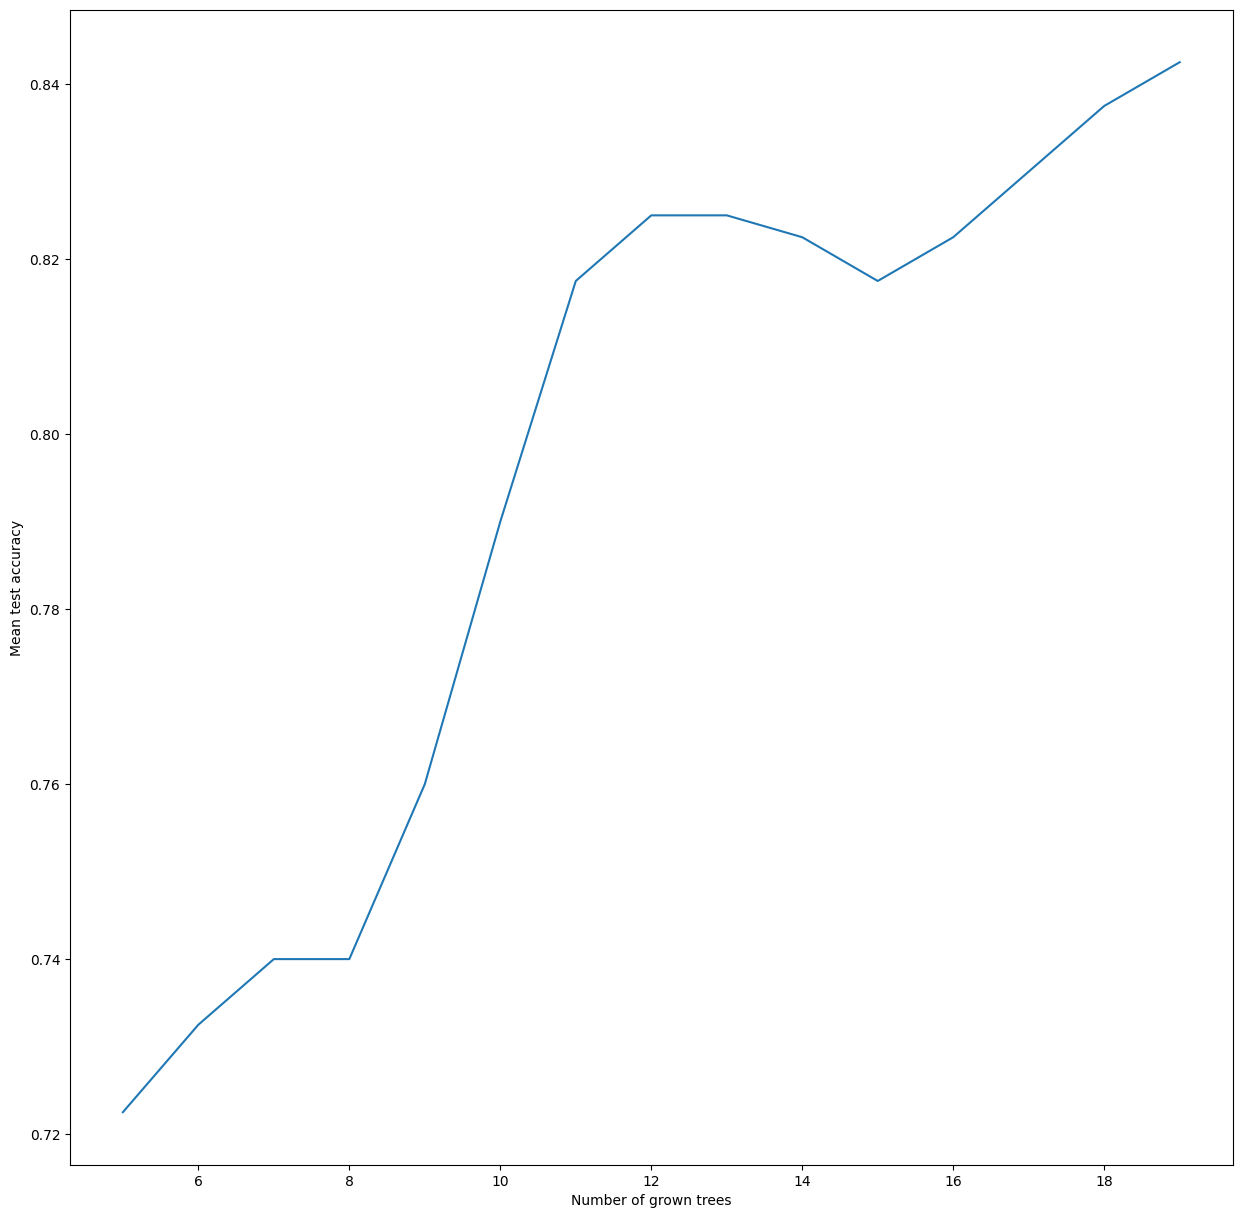

In [41]:
#We use the best to vizuallize the accuracy as a function of the grown trees
#What are they?
df_num_estimators = df[((df['param_max_features']==50) & (df['param_max_depth']==8))]

fig, ax = plt.subplots(figsize=(15,15))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='mean_test_score', ax=ax)
ax.set_xlabel('Number of grown trees')
ax.set_ylabel('Mean test accuracy')


> a) How should you set the parameters to run bagging?

> b) How should you set the parameters to run CART?

> c) Plot variable importances and a variable correlation matrix. How do you interpret
these?

In [ ]:
X.shape

In [42]:
## Look at the best estimator and the importance of the features
score = rf_grid.best_estimator_.fit(X, y)
headers = ["name", "score"]
values = sorted(zip(range(0,P), rf_grid.best_estimator_.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 256
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
print ('Random Forest OOB error rate: {}'.format(1 - rf_grid.best_estimator_.oob_score_))

  name      score
   196  0.0266823
   152  0.0248614
   118  0.0215206
    88  0.0203207
    22  0.0173476
    56  0.0172545
   168  0.0170932
   103  0.0165344
   212  0.0160356
   131  0.0159488
Random Forest OOB error rate: 0.18999999999999995


> d) Add five randomly generated, white noise, variables to the dataset and investigate
how you can use their information to derive a cut-off value to select varaibles based
on the variable importances

In [43]:

np.random.seed(0)  
white_noise = np.random.rand(X.shape[0], 5) 
X_with_white_noise_features = np.hstack((X, white_noise))  

# Here we refit the model to the data including the white noise attributes
score = rf_grid.best_estimator_.fit(X_with_white_noise_features, y)
feature_importances = rf_grid.best_estimator_.feature_importances_
headers = ["name", "score"]
#Add labels for the white noise features as well
feature_names = [f"Feature {i}" for i in range(P)] + [f"White Noise {i}" for i in range(1, 6)]
values = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances, for cut off look at the sorted list of variables
print(tabulate(values, headers=headers, tablefmt="plain"))


name                 score
Feature 196    0.0313931
Feature 37     0.0268848
Feature 152    0.0255555
Feature 212    0.0185595
Feature 58     0.0182401
Feature 117    0.0178734
Feature 72     0.0170715
Feature 229    0.016746
Feature 135    0.0162539
Feature 109    0.0149349
Feature 103    0.0145994
Feature 134    0.0143759
Feature 118    0.0142549
Feature 248    0.0136322
Feature 59     0.0135361
Feature 89     0.0134132
Feature 75     0.0132366
Feature 183    0.0129084
Feature 114    0.0127614
Feature 136    0.0126556
Feature 24     0.0126447
Feature 210    0.0125038
Feature 26     0.0123254
Feature 167    0.0120489
Feature 138    0.0114035
Feature 87     0.0113568
Feature 104    0.0112651
Feature 56     0.0111838
Feature 120    0.0110831
Feature 71     0.011017
Feature 119    0.0106837
Feature 218    0.0096212
Feature 148    0.00933702
Feature 23     0.00900796
Feature 91     0.00878277
Feature 213    0.0087201
Feature 102    0.00856924
Feature 184    0.00831564
Feature 116    0.008